<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=12cYJdWfM_vj2K8UwpV4vcy54BUIXLn7v" alt="d" width="950">




# Regresores en Scikit-learn

## SGDRegressor (Stochastic Gradient Descent Regressor):
- SGDRegressor se basa en el algoritmo de descenso de gradiente estocástico, que es una técnica de optimización iterativa.
- Actualiza los coeficientes del modelo utilizando un pequeño subconjunto aleatorio de datos de entrenamiento (conocidos como minilotes) en cada iteración.
- Este algoritmo es adecuado para conjuntos de datos grandes o problemas de alta dimensión en los que es posible que todo el conjunto de datos no quepa en la memoria.
- SGDRegressor permite el aprendizaje en línea, lo que significa que puede actualizar el modelo en tiempo real a medida que haya nuevos datos disponibles.
- La función de pérdida utilizada en SGDRegressor se puede personalizar y se pueden aplicar varias técnicas de regularización como la regularización L1 o L2.

## LinearRegression:
- LinearRegression se basa en el método de mínimos cuadrados ordinarios, que resuelve directamente el problema analíticamente minimizando la suma de residuos al cuadrado.
- Calcula los coeficientes del modelo utilizando todo el conjunto de datos de entrenamiento simultáneamente.
- LinearRegression es computacionalmente eficiente para conjuntos de datos más pequeños o problemas con dimensiones bajas.
- No admite el aprendizaje en línea y requiere que todo el conjunto de datos esté disponible durante el entrenamiento del modelo.
-LinearRegression supone una relación lineal entre las variables de entrada y la variable de destino.

## Ejemplo con Linear Regressor

Usaremos el dataset kc_house_data (https://www.kaggle.com/shivachandel/kc-house-data ),el cual contiene datos de distintas casas en Washington, EEUU.

Se puede descargar el conjunto de datos desde este enlace:
https://drive.google.com/file/d/1sIwmhhn50utRZY556ENMAa13sIxWSzHj/view?usp=sharing





In [ ]:
import pandas as pd

from google.colab import files #estas dos lineas de codigo permiten subir el archivo vsc a Google Colab clickeando "examinar"
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import io # No preocuparse por esta linea, lo importante es que nos permite leer vsc que subimos
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))# esta linea se encagarga de contener df en el dataframe


KeyError: 'data.csv'

In [ ]:
df2 = pd.read_csv('data.csv')

In [ ]:
df2.shape

(4600, 18)

In [ ]:
df=df2

Antes de hacer cualquier otra cosa es importante examinar y entender el dataset, por eso se utilizaran algunas funciones de ejemplo. Como describe, head, shape y dtypes



In [ ]:
df.describe() # la funcion describe nos muestra un buen resumen del dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.head() # la funcion head nos muestra los primeros 5 elementos del dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape # la funcion shape nos da la forma del dataset en este formato (Cantidad de filas, cantidad de columnas)

#Las cantidad de filas representa la cantidad de casas del dataset
#La cantidad de columnas representa la cantidad de atributos o datos que tiene cada casa del dataset

(4600, 18)

In [ ]:
df.dtypes # la funcion dtypes nos muestra los tipos de variables del dataset, podemos ver que la mayoria son numeros enteros

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
correlations = df.corr()['price']

# la funcion corr nos permite obtener las correlaciones entre las distintas variables
# En este caso selecionamos del dataframe la variable "price" (precio), por lo cual
# obtendremos las relaciones entre esta variable y las demas
# Entre mas cercano a 1 sea el valor mayor es la correlacion y mejor es la variable para predecir "price"

print(correlations) # imprimimos los valores

#sqft_living (pies cuadrados de la vivienda) deberia dar el valor de mayor correlacion con el precio de la casa


price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


<ipython-input-13-40eb7df9b25e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['price']


Al usar la función shape la consola debería haber mostrado que el dataset contiene 4600, lo cual puede ser una cantidad incomoda para visualizar en gráficas como haremos más adelante. Por este motivo en el siguiente bloque de codigo vamos a "achicar el dataset", dejando solo 15 casas para analizar. Más adelante usaremos todo el dataset y podremos comparar resultados.

In [ ]:
df_min = df.sample(15, random_state=10) #creamos un nuevo dataset al cual copiamos 15 valores del dataset original


# Definimos como X los valores de la columna que contiene el área de la vivienda en pies cuadrados
X = df_min['sqft_living'].values.reshape(-1,1)

# Definimos como Y la columna que contiene los precios de las viviendas
y = df_min['price'].values.reshape(-1,1)




Text(0.5, 0, 'Superficie en pies cuadrados')

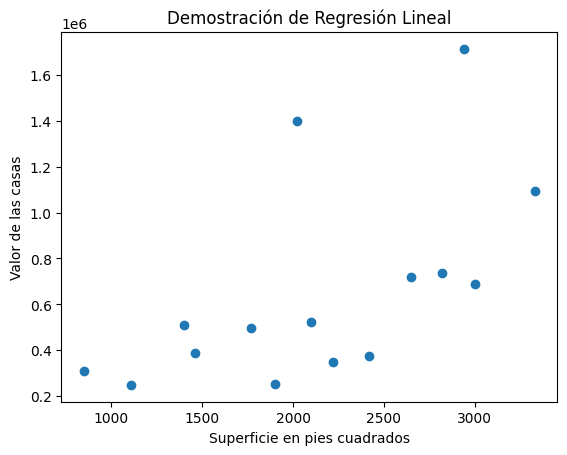

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar


# Ahora que tenemos un conjunto de datos mas pequeño deberia ser facil graficarlo

plt.scatter(X,y) # Genera una grafica de puntos

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)



Matematicamente, los valores obtenidos a través de la recta se representan matemáticamente así:

*ŷ*, para diferenciarlo de la *y* común, la cual en este caso contiene los valores de precios. Como a *ŷ* se le suele decir "y con sombrero" (en inglés "hat" es "sombrero") llamaremos a la variable que contiene los valores predecidos y_hat, lo cual seria como llamarla y_con_sombrero

In [ ]:
y_hat = reg.predict(X) # Sustituimos en la recta (y = mx + b) nuestros valores iniciales de X
print(y_hat) # guardamos los resultados en y_hat

[[ 642452.08098755]
 [ 953370.59047547]
 [ 932642.68984294]
 [ 832457.83678573]
 [ 891186.88857789]
 [ 683907.88225261]
 [ 400626.57360806]
 [ 210620.81780988]
 [ 528103.1624981 ]
 [ 614814.88014418]
 [1067374.04395438]
 [ 422390.86927221]
 [ 753000.88436103]
 [ 300441.72055084]
 [ 573359.07887912]]


Text(0.5, 0, 'Superficie en pies cuadrados')

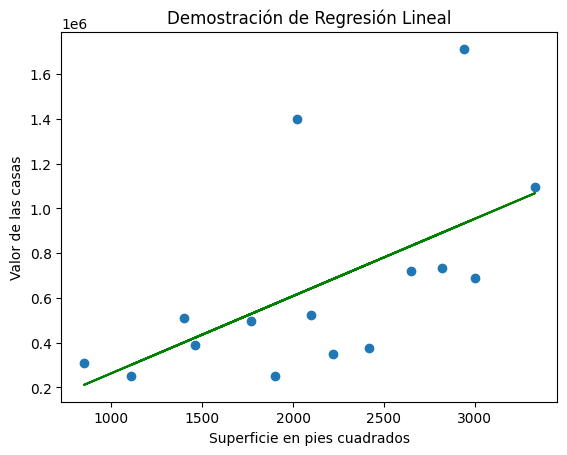

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y)
plt.plot(X, y_hat, color='green')

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

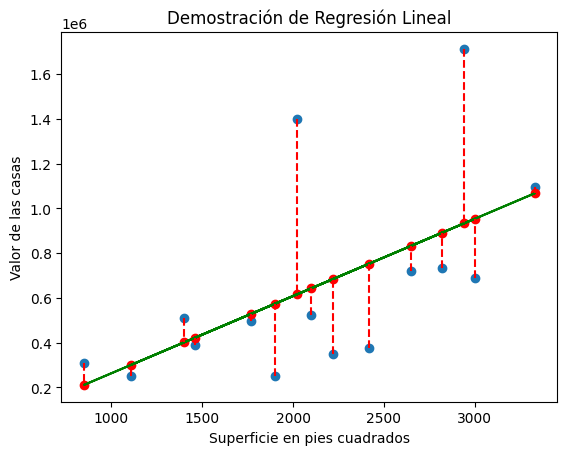

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar



plt.scatter(X,y) # Grafica de dispersion, muestra los puntos iniciales

# grafica de dispersion, muestra los puntos que se obtienen al sustituir nuestros valores iniciales de X en la ecuacion y = mx + b obtenida mediante regresion
plt.scatter(X,y_hat, color='red')

plt.plot(X, y_hat, color='green') # Dibuja la linea de regresion


plt.title('Demostración de Regresión Lineal') # asigna titulo a la grafica
plt.ylabel('Valor de las casas') # asigna nombre al eje y de la grafica
plt.xlabel('Superficie en pies cuadrados') # asigna nombre al eje x de la grafica


# Loop, el cual recorre todos los valores de los conjuntos X, y, y_hat
# a medida que los recorre va dibujando lineas punteadas para ilustrar el error de la regresion
for i in range(0, len(X)):
  point1 = [X[i], y[i]]
  point2 = [X[i], y_hat[i]]

  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]

  plt.plot(x_values, y_values, color='red', linestyle='dashed')



En este momento en la variable y tenemos los valores de precios originales, mientras que en y_hat tenemos los valores de precios obtenidos mediante la regresión lineal. Si comparamos la diferencia entre estos valores podemos obtener el R2 de la recta.


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)


0.3423457286372724

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_hat)

115311833225.54129


Pero es momento de recordar que de los miles de datos del dataset utilizamos solo 15. ¿Qué sucede si los usamos todos?

Text(0.5, 0, 'Superficie en pies cuadrados')

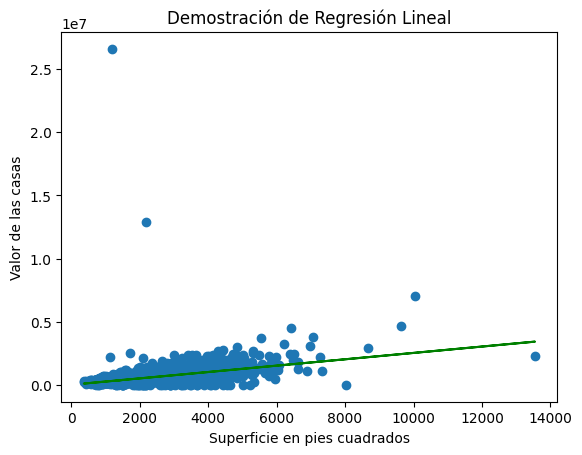

In [ ]:
# Ejercicio
X1 = df['sqft_living'].values.reshape(-1,1)
y1 = df['price']

reg = LinearRegression().fit(X1,y1)
y_hat1 = reg.predict(X1)

plt.scatter(X1,y1)
plt.plot(X1, y_hat1, color='green')
plt.title('Demostración de Regresión Lineal')
plt.ylabel('Valor de las casas')
plt.xlabel('Superficie en pies cuadrados')

Ahora que tengo todos los datos la recta ya no parece tan representativa, ¿No?

Veamos su valor de R2

In [ ]:
# Ejercicio
r2_score(y1, y_hat1)

0.18525278999291528

In [ ]:
mean_squared_error(y,y_hat)


115311833225.54129

Al imprimir nuevamente las correlaciones podemos ver que hay otras variables que tienen una alta relación con la variable de precio, "bathrooms " , "grade", y "sqft_above". Todas estas variables también son importantes y no las estamos considerando. Por este motivo, en futuros ejercicios te mostraremos como hacer regresiones con múltiples variables.

#SGD Regressor


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit(X1)

X1=std.transform(X1)

sgdr=SGDRegressor(max_iter=100)
sgdr.fit(X1, y1)
sgdPred=sgdr.predict(X1)

In [ ]:
r2_score(y1, sgdPred)

0.18524994948540552

In [ ]:
mean_squared_error(y1,sgdPred)

258960531671.5829

Text(0.5, 0, 'Superficie en pies cuadrados')

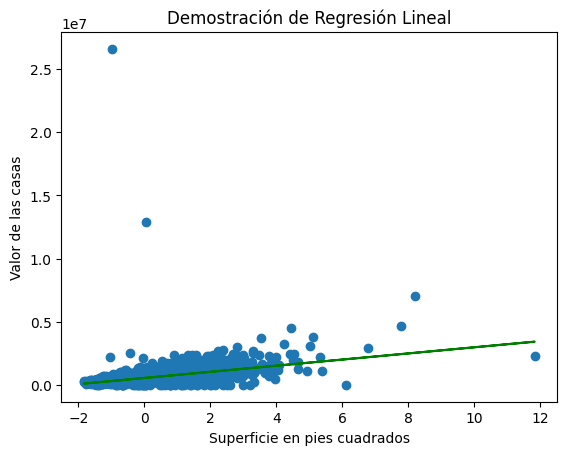

In [ ]:
plt.scatter(X1,y1)
plt.plot(X1, sgdPred , color='green')
plt.title('Demostración de Regresión Lineal')
plt.ylabel('Valor de las casas')
plt.xlabel('Superficie en pies cuadrados')

# Multilinear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Dataset

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data.shape

(506, 13)

In [ ]:
x = data
y = target

###  Dividiendo la data en test y train



In [ ]:
train,test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
std=StandardScaler()
std.fit(train)
train=std.transform(train)
test=std.transform(test)

In [ ]:
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## 1] Linear Regression:

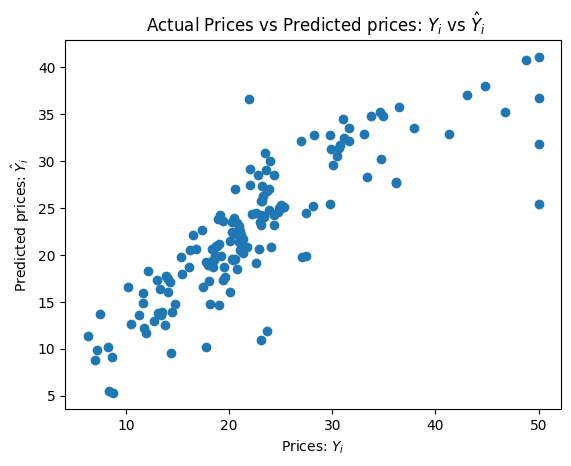

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(train, y_train)

Y_pred = linear.predict(test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title(" Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\n---R2--- \n",r2_score(y_test,Y_pred))
print("\n---MSE--- \n",mean_squared_error(y_test,Y_pred))


---R2--- 
 0.7174761101033671

---MSE--- 
 23.487688152265495


In [ ]:
linear.coef_

array([-0.69372934,  1.11194177, -0.49149643,  0.30781264, -1.80316558,
        2.25113781, -0.38623299, -3.35718562,  3.91212906, -3.47376208,
       -1.92539535,  0.89092961, -3.49025785])

## 2] SGDRegressor:

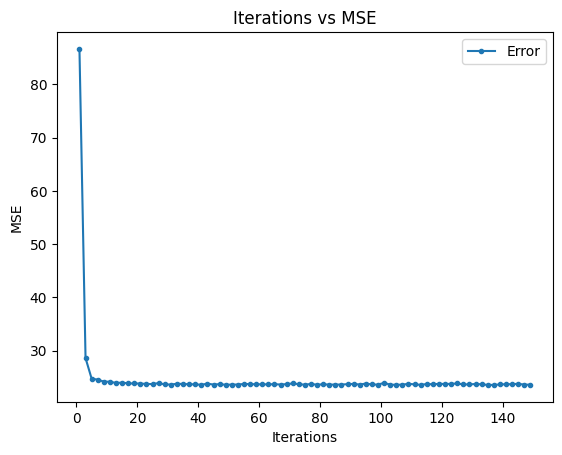

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


MSE=[]

from sklearn.linear_model import SGDRegressor

iterations=[i for i in range(1,150,2)]

for i in iterations:

    sgdr=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr.fit(train, y_train)
    sgdPred=sgdr.predict(test)


    mse=mean_squared_error(y_test,sgdPred)
    MSE.append(mse)


plt.plot(iterations, MSE, label='Error',marker = '.')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()





------------For iteration =  1 -------------

---R2--- 
 -0.02596026486378178

---MSE--- 
 97.02302134036948

---Weights---
 [-0.34679386  0.58680319 -0.70723306  1.30459713 -0.33893071  2.56821037
  0.04261422 -0.78074453 -0.09561643 -0.72056562 -1.41001295  0.80157429
 -2.30339348]


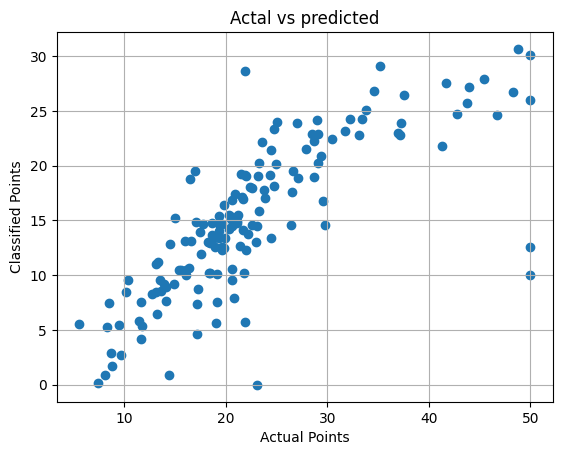



------------For iteration =  5 -------------

---R2--- 
 0.6308404250323114

---MSE--- 
 34.91068664812983

---Weights---
 [-0.25508865  0.30686425 -0.67903888  1.30948265 -0.75224008  3.35284109
 -0.22841113 -1.54537773  0.67370823 -0.3680517  -1.94078619  0.97831224
 -2.99343059]


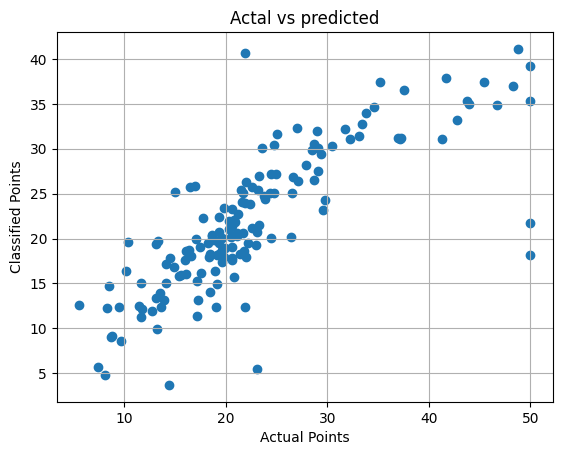



------------For iteration =  10 -------------

---R2--- 
 0.6396439675344958

---MSE--- 
 34.07815314628541

---Weights---
 [-0.15091112  0.41795448 -0.30223229  1.30543685 -1.00131068  3.34170425
 -0.38806123 -1.93856869  0.68752962 -0.37507126 -1.97155419  1.05946599
 -2.9970252 ]


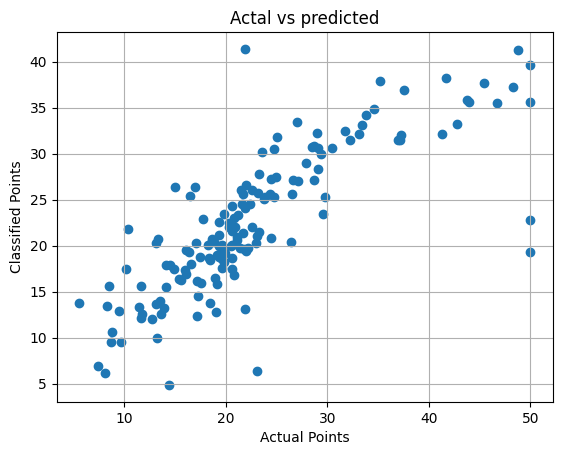



------------For iteration =  15 -------------

---R2--- 
 0.6520573868453644

---MSE--- 
 32.904240775648645

---Weights---
 [-0.2286482   0.55505795 -0.37255379  1.27313926 -1.17062004  3.23433518
 -0.31428537 -2.12419955  0.93758771 -0.67071913 -2.01028223  1.05715171
 -3.18654573]


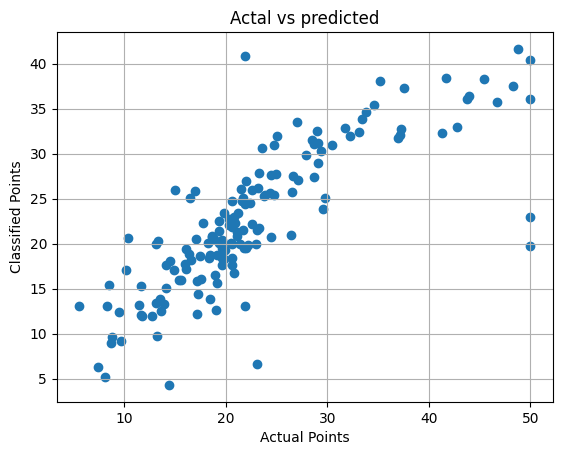

In [ ]:
iteration=[1,5,10,15]
for i in iteration:


    sgdr1=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr1.fit(train, y_train)
    sgdPredi=sgdr1.predict(test)


    print("\n\n------------For iteration = ",i,"-------------")
    print("\n---R2--- \n",r2_score(y_test,sgdPredi))
    print("\n---MSE--- \n",mean_squared_error(y_test,sgdPredi))
    print("\n---Weights---\n",sgdr1.coef_ )


    plt.title("Actal vs predicted")
    plt.scatter(y_test, sgdPredi)
    plt.ylabel('Classified Points')
    plt.xlabel('Actual Points')
    plt.grid()
    plt.show()

In [ ]:
sgdr12=SGDRegressor(max_iter=1000,eta0=0.01)
sgdr12.fit(train, y_train)
sgdPredi=sgdr12.predict(test)
print("\n---Weights---\n",sgdr12.coef_ )
print("\n---R2--- \n",r2_score(y_test,sgdPredi))
print("\n---MSE--- \n",mean_squared_error(y_test,sgdPredi))


---Weights---
 [-0.23806226  0.54721665 -0.364012    1.26923123 -1.26835375  3.14465515
 -0.31209494 -2.31642463  1.04151458 -0.57605414 -2.03097902  1.04993266
 -3.1511086 ]

---R2--- 
 0.6530434232372263

---MSE--- 
 32.810993275558864


In [ ]:
for alpha in [0.0001,0.001,0.01,0.1]:
    sgdr12=SGDRegressor(max_iter=10000,eta0=alpha)
    sgdr12.fit(train, y_train)
    sgdPredi=sgdr12.predict(test)
    print("APLHA ", alpha)
    print("\n---Weights---\n",sgdr12.coef_ )
    print("\n---R2--- \n",r2_score(y_test,sgdPredi))
    print("\n---MSE--- \n",mean_squared_error(y_test,sgdPredi))

APLHA  0.0001

---Weights---
 [-0.24887593  0.43276225 -0.4890376   1.34188582 -0.63573508  3.34115604
 -0.22007169 -1.51537715  0.48537461 -0.35350065 -1.85292051  0.96086051
 -2.90757382]

---R2--- 
 0.6217461117758761

---MSE--- 
 35.77071776178342
APLHA  0.001

---Weights---
 [-0.1987532   0.4697804  -0.43179077  1.29102305 -0.98122525  3.27939922
 -0.30893415 -1.96789573  0.77545764 -0.4541118  -1.96733396  1.04459976
 -3.08880615]

---R2--- 
 0.6443483939298997

---MSE--- 
 33.6332649004272
APLHA  0.01

---Weights---
 [-0.27151981  0.5717117  -0.2952679   1.31769701 -1.28705026  3.16864202
 -0.32483367 -2.32915226  1.16355605 -0.70788417 -2.03548935  1.05829761
 -3.14672606]

---R2--- 
 0.652711020718489

---MSE--- 
 32.84242792051886
APLHA  0.1

---Weights---
 [-0.27003101  0.68306887 -0.07962974  1.01322848 -1.98854868  3.26970291
 -0.19719219 -2.73534162  1.98250201 -1.7512599  -2.21825045  0.60407852
 -3.21305573]

---R2--- 
 0.6732962376253213

---MSE--- 
 30.89572490711033


## Linear Regression(mathematical ) VS Sklearn SGDRegressor

In [ ]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]

ptable = PrettyTable()


ptable.add_column("Sr.NO.",numbering)
ptable.add_column("Weights Linear regression",linear.coef_)
ptable.add_column("Weights of Sklearn's SGDregressor",sgdr12.coef_)



print(ptable)

+--------+---------------------------+-----------------------------------+
| Sr.NO. | Weights Linear regression | Weights of Sklearn's SGDregressor |
+--------+---------------------------+-----------------------------------+
|   1    |    -0.39978519172157045   |        -0.23806225880800777       |
|   2    |      0.82109901699407     |         0.5472166524795075        |
|   3    |    0.052100515684116666   |        -0.3640119978038716        |
|   4    |     1.2040014103550856    |         1.2692312302760722        |
|   5    |    -1.6553234776951125    |         -1.268353745206778        |
|   6    |     3.0071697901721937    |         3.144655151565742         |
|   7    |    -0.25456748741883495   |        -0.31209493697093466       |
|   8    |    -2.6066898297987096    |        -2.3164246325265836        |
|   9    |     1.990405279313579     |         1.0415145803577088        |
|   10   |    -1.6055246143595374    |        -0.5760541373401047        |
|   11   |     -2.0875499

In [ ]:
print("Mse of Linear Regression ",mean_squared_error(y_test,Y_pred))

Mse of Linear Regression  31.261316950877532


In [ ]:
print("MSE of SKlearn's SGDRegressor = ",mean_squared_error(y_test,sgdPredi))

MSE of SKlearn's SGDRegressor =  32.810993275558864


# Otros Regresores

In [ ]:
# Arbol de Decision
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth = 15, random_state=0)
dt_reg.fit(train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [ ]:
dt_pred = dt_reg.predict(test)

In [ ]:
mean_squared_error(y_test,dt_pred)

18.16247391637576

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
rf_reg.fit(train, y_train)
rf_pred = rf_reg.predict(test)
mean_squared_error(y_test, rf_pred)

14.175857038282075

In [ ]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 100, random_state = 0).fit(train, y_train)
gb_pred= gb_reg.predict(test)

mean_squared_error(y_test, gb_pred)

11.452229266177987